In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
OUT_DIR = "./Histograms_of_Variables/"
os.makedirs(OUT_DIR, exist_ok=True)

In [9]:
# import data from CSV
dataframe = pd.read_csv("dataframe.csv", delimiter=",")
data=pd.read_csv("Output_ZPrimeBoostedAnalysis/data.csv",delimiter=" ")

data

,etmiss,mtw,leadleptPt,leadleptEta,leadleptE,leadleptPhi,Q_leadlep,leadleptID,n_TopLRjets,leadTopLRjet_pt,...,n_bjets,leadbjet_pt,leadbjet_eta,ttbarMLR,largeRjet_pt_total,largeRjet_eta_total,largeRjet_phi_total,largeRjet_m_total,largeRjet_tau32_total,weight
0,140.8590,112.6010,173.3020,-0.719597,220.1410,-0.629445,1,11,1,303.808,...,2,74.2067,1.155760,0.000,303.808,0.716499,2.340630,105.440,0.701667,1
1,101.1240,12.9607,84.2450,0.521832,95.9780,1.694020,1,13,1,319.519,...,1,229.1180,-0.005455,0.000,319.519,-0.207688,-1.050650,124.417,0.658574,1
2,93.8502,145.9590,69.5917,-0.571767,81.2804,2.401100,1,11,1,379.502,...,1,354.8290,0.387903,0.000,379.502,0.429905,-0.032258,101.729,0.705147,1
3,79.1584,78.5076,39.4455,0.320825,41.4930,1.189650,-1,11,1,364.358,...,2,111.3740,-1.131620,0.000,673.232,-0.882717,2.047210,211.584,1.222030,1
4,49.9677,119.0770,78.1793,-1.261530,149.0890,-0.060379,1,11,1,381.640,...,4,327.3410,-0.637407,836.840,749.172,-1.939400,-0.584009,245.185,1.182330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983,51.2650,36.3069,32.4356,-1.826030,103.3120,2.875370,1,11,1,313.153,...,1,63.3124,-2.219060,0.000,313.153,-1.469270,-0.309966,149.170,0.428863,1
13984,177.2230,98.1917,226.8500,0.625051,272.6260,2.951550,-1,13,1,403.237,...,1,79.7143,0.725713,858.712,403.237,-0.551284,-0.521822,163.453,0.696539,1
13985,379.7260,76.7778,38.0448,0.559037,44.1463,-2.853520,1,13,1,618.111,...,2,120.5620,2.143520,0.000,883.045,1.610580,-3.028970,283.641,1.011700,1
13986,76.5990,32.0798,68.3700,-0.439462,75.0790,-0.758893,1,11,1,336.483,...,1,173.8460,1.078890,0.000,336.483,1.348570,1.986230,103.251,0.382302,1


In [10]:
signal_data = dataframe.loc[dataframe["ID"] == "signal"]
ttbar_bkg=dataframe.loc[dataframe["ID"] == "ttbar_bkg"]
lepton_bkg=dataframe.loc[dataframe["ID"] == "lepton_bkg"]
V_jets_bkg=dataframe.loc[dataframe["ID"] == "V_jets_bkg"]
single_top_bkg=dataframe.loc[dataframe["ID"] == "single_top_bkg"]
bkg=dataframe.loc[dataframe["label"] == 0]

In [11]:
ranges_bins = {"etmiss": [0, 400, 30], "leadbjet_eta": [-3, 3, 30], "leadbjet_pt": [0, 400, 20], 
                "leadjet_eta": [-3, 3, 30], "leadjet_pt": [0, 400, 20], 
                "Q_leadlep": [-1.5, 1.5, 7], "leadleptE": [0, 500, 30], "leadleptEta": [-3, 3, 30], 
                "leadleptID": [6, 20, 15], "leadleptPhi":[-3.2, 3.2, 32], "leadleptPt": [0, 400, 20], 
                "largeRjet_eta_total": [-3, 3, 20], "largeRjet_m_total": [50, 250, 30], "largeRjet_phi_total": [-3.2, 3.2, 12],
                "largeRjet_pt_total": [250, 700, 30], "largeRjet_tau32_total": [0, 1, 20], "leadTopLRjet_eta": [-3, 3, 20],
                "leadTopLRjet_m": [100, 250, 25], "leadTopLRjet_phi": [-3.2, 3.2, 12], 
                "leadTopLRjet_pt": [250, 700, 30],
                "leadTopLRjet_Tau32": [0, 1, 20], "mtw": [0, 250, 30], "n_bjets": [-0.5, 3.5, 4], 
                "n_jets": [-0.5, 3.5, 4], "n_TopLRjets": [-0.5, 3.5, 4],
                "ttbarMLR": [400, 1600, 20]}
# "leadTopLRjet_syst_pt": [250, 700, 30], 
# "n_leadLRjets": [-0.5, 3.5, 4],

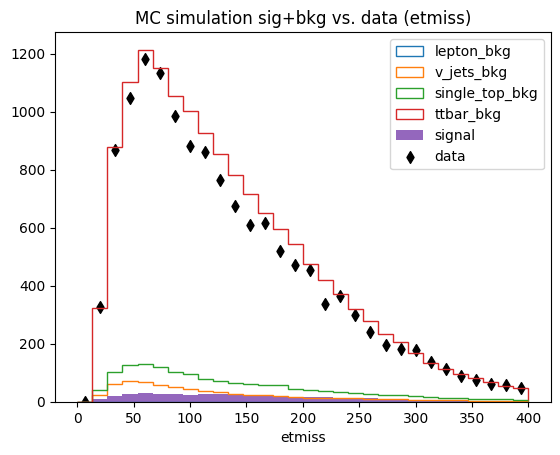

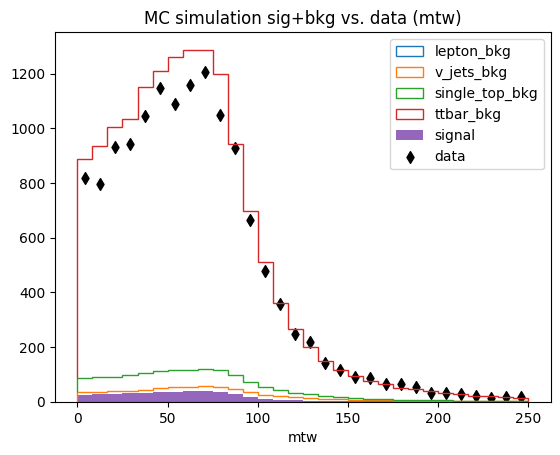

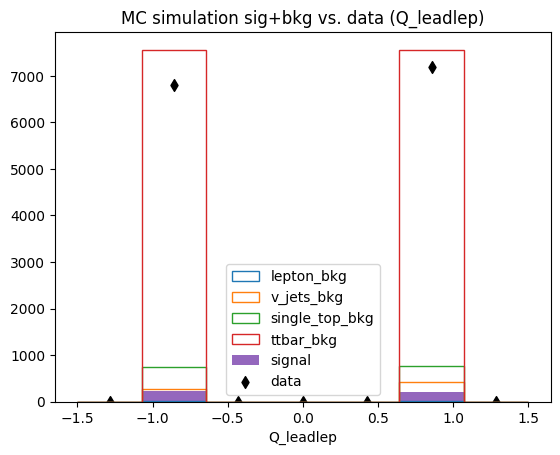

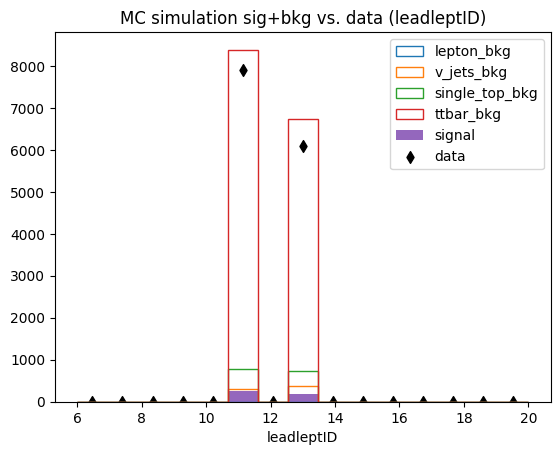

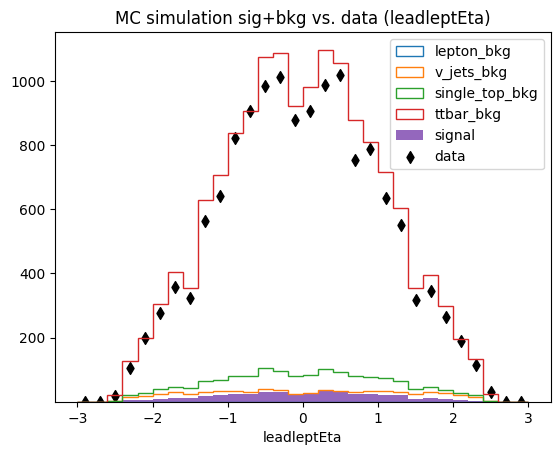

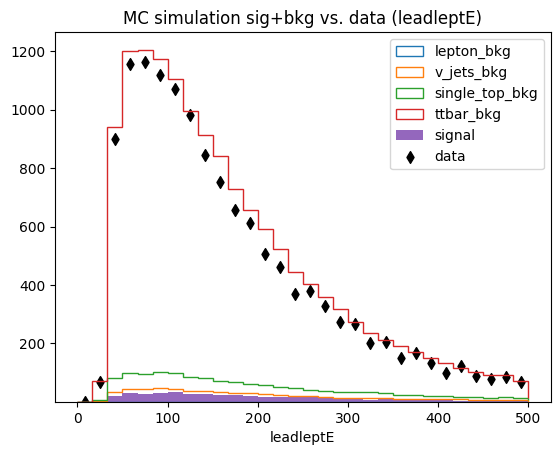

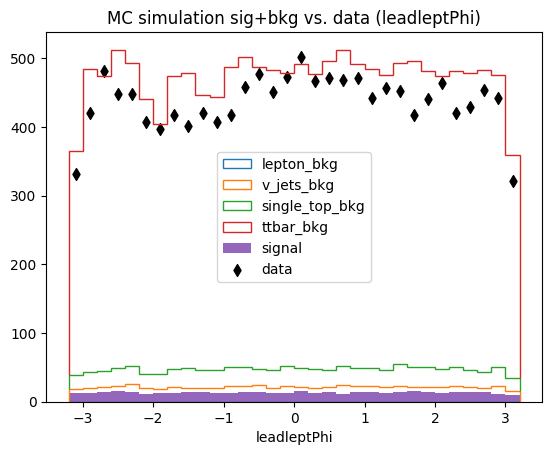

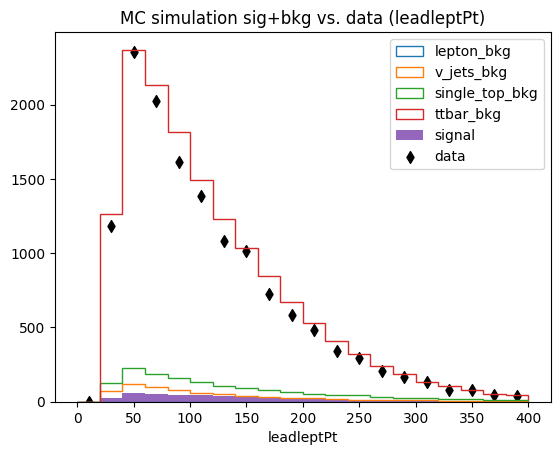

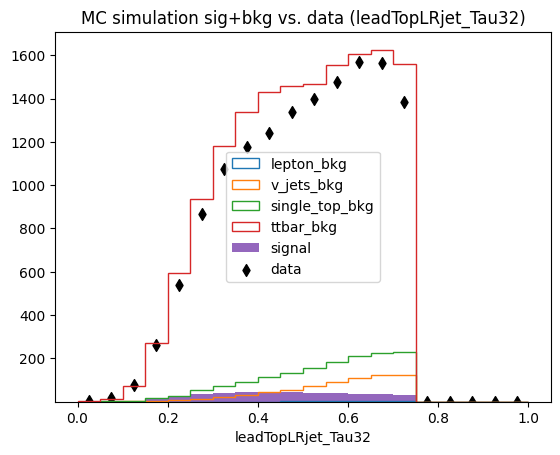

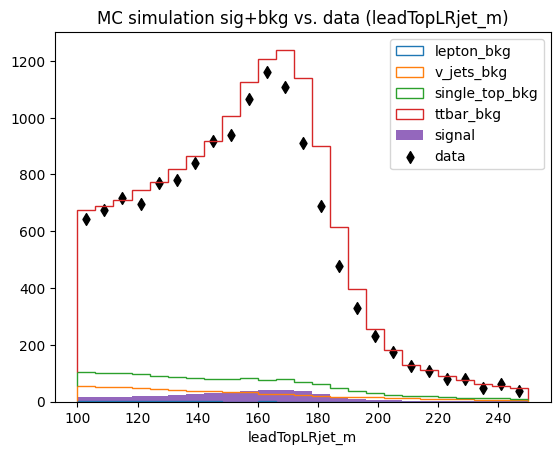

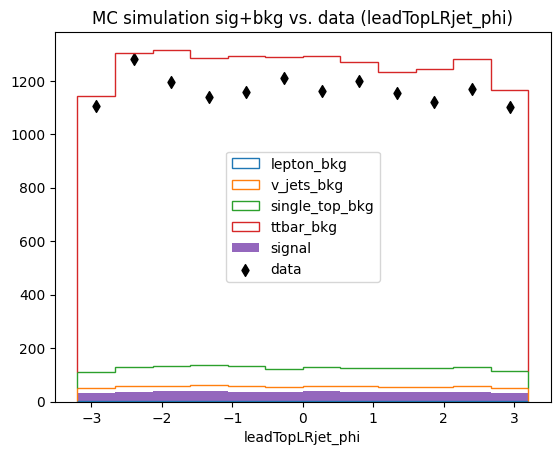

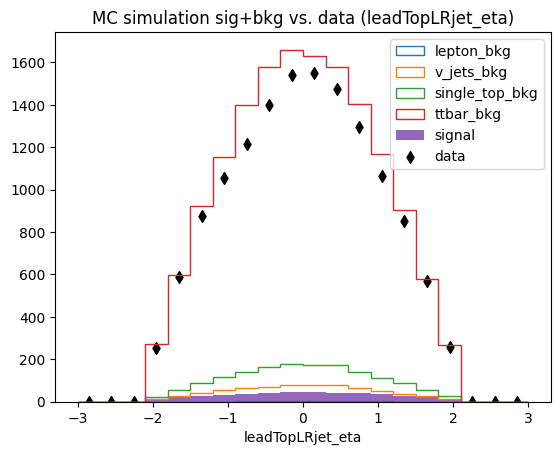

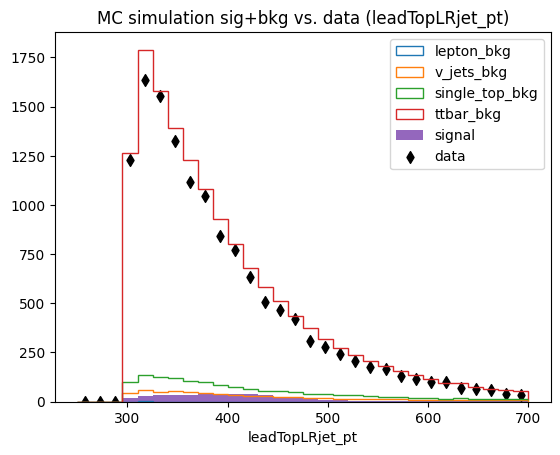

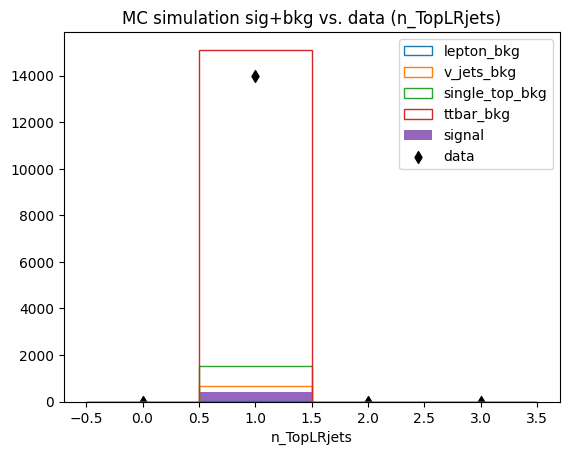

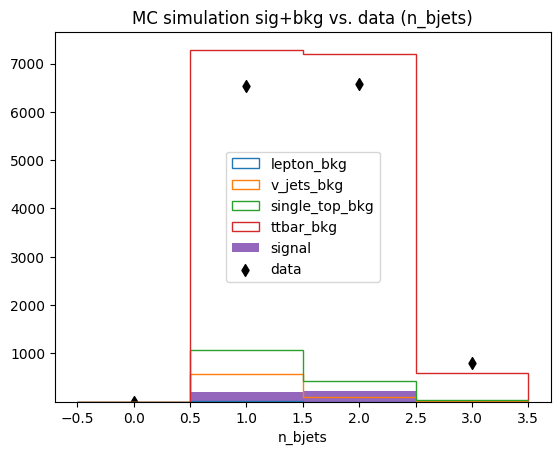

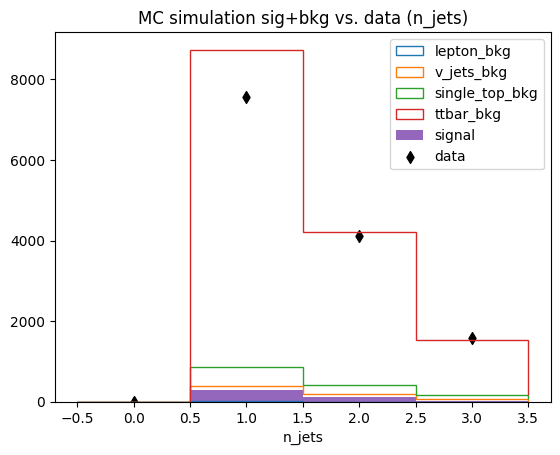

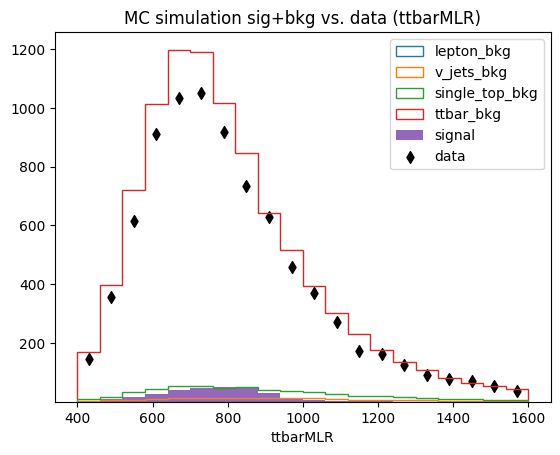

In [49]:
plot_features = ["etmiss", "mtw", "Q_leadlep", "leadleptID", "leadleptEta", "leadleptE", "leadleptPhi", "leadleptPt",
                 "leadTopLRjet_Tau32","leadTopLRjet_m", "leadTopLRjet_phi", "leadTopLRjet_eta", "leadTopLRjet_pt", "n_TopLRjets", "n_bjets", "n_jets", "ttbarMLR"]

# multiply all columns by the weights
for i in plot_features:
    
    data_to_plot = np.histogram(data[i], bins=ranges_bins[i][2], range=(ranges_bins[i][0], ranges_bins[i][1]))
    interval = (ranges_bins[i][1] - ranges_bins[i][0])/(2*ranges_bins[i][2])

    bins = plt.hist(lepton_bkg[i], bins=ranges_bins[i][2], histtype="step", linewidth=1, 
                    weights=lepton_bkg["scaleweight"], range=(ranges_bins[i][0], ranges_bins[i][1]), label="lepton_bkg")
    
    bins_vjets = plt.hist(V_jets_bkg[i], bins=bins[1], histtype="step", linewidth=1, 
                          weights=V_jets_bkg["scaleweight"], range=(ranges_bins[i][0], ranges_bins[i][1]), label="v_jets_bkg", bottom = bins[0])
    
    bins_singtop = plt.hist(single_top_bkg[i], bins=bins[1], histtype="step", linewidth=1, 
                            weights=single_top_bkg["scaleweight"], range=(ranges_bins[i][0], ranges_bins[i][1]), label="single_top_bkg", bottom = bins[0] + bins_vjets[0])
    
    plt.hist(ttbar_bkg[i], bins=bins[1], histtype="step", linewidth=1, weights=ttbar_bkg["scaleweight"], 
             range=(ranges_bins[i][0], ranges_bins[i][1]), label="ttbar_bkg", bottom = bins[0] + bins_vjets[0] + bins_singtop[0])
    
    bins_sig = plt.hist(signal_data[i], bins=bins[1], histtype="bar", linewidth=1, 
                        weights=signal_data["scaleweight"], range=(ranges_bins[i][0], ranges_bins[i][1]), label="signal", bottom = bins[0])
    
    plt.scatter(data_to_plot[1][:-1] + interval, data_to_plot[0], label="data", marker="d", color="black")

    plt.xlabel(i)
    plt.legend()
    title="MC simulation sig+bkg vs. data ("+i+")"
    plt.title(title)
    plt.savefig(OUT_DIR + "plot_"+i+".png")
    plt.show()
  
    

